In [1]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sbn

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error

import xgboost as xgb

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
db=pd.read_csv("my_New_dataset.csv")

In [4]:
db

,index,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status
0,0,1.0,22,59000,0,123.0,3,2,35000.0,16.02,10,3,1
1,1,2.0,21,9600,1,5.0,0,0,1000.0,11.14,1,2,0
2,2,3.0,25,9600,2,1.0,1,1,5500.0,12.87,5,3,1
3,3,4.0,23,65500,0,4.0,1,1,35000.0,15.23,10,2,1
4,4,5.0,24,54400,0,8.0,1,1,35000.0,14.27,10,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32581,32577.0,57,53000,2,1.0,3,2,5800.0,13.16,7,30,0
32574,32582,32578.0,54,120000,2,4.0,3,0,17625.0,7.49,4,19,0
32575,32583,32579.0,65,76000,0,3.0,5,1,35000.0,10.99,5,28,1
32576,32584,32580.0,56,150000,2,5.0,3,1,15000.0,11.48,6,26,0


In [5]:
d=db.drop(['customer_id','index','customer_age'], axis=1)

In [6]:
d

,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status
0,59000,0,123.0,3,2,35000.0,16.02,10,3,1
1,9600,1,5.0,0,0,1000.0,11.14,1,2,0
2,9600,2,1.0,1,1,5500.0,12.87,5,3,1
3,65500,0,4.0,1,1,35000.0,15.23,10,2,1
4,54400,0,8.0,1,1,35000.0,14.27,10,4,1
...,...,...,...,...,...,...,...,...,...,...
32573,53000,2,1.0,3,2,5800.0,13.16,7,30,0
32574,120000,2,4.0,3,0,17625.0,7.49,4,19,0
32575,76000,0,3.0,5,1,35000.0,10.99,5,28,1
32576,150000,2,5.0,3,1,15000.0,11.48,6,26,0


In [7]:
X=d.drop('Current_loan_status',axis=1)
y=d['Current_loan_status']

In [8]:
result=[]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution after applying SMOTE
print(f"Before SMOTE: {y_train.value_counts()}")
print(f"After SMOTE: {pd.Series(y_train_smote).value_counts()}")

Before SMOTE: Current_loan_status
0    20563
1     5499
Name: count, dtype: int64
After SMOTE: Current_loan_status
1    20563
0    20563
Name: count, dtype: int64


In [10]:
model = RandomForestClassifier()
model.fit(X_train_smote, y_train_smote)

#Make predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Acc=accuracy * 100
print(y_pred)


print(f'Accuracy: {accuracy * 100:.2f}%')
result.append({'Model':'Random Forest Clasiifier', 'Accuracy':Acc})
#Optional: classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[1 0 0 ... 0 0 1]
Accuracy: 89.18%
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      5177
           1       0.73      0.76      0.74      1339

    accuracy                           0.89      6516
   macro avg       0.83      0.84      0.84      6516
weighted avg       0.89      0.89      0.89      6516

[[4799  378]
 [ 327 1012]]


In [11]:
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Acc=accuracy * 100
print(y_pred)


print(f'Accuracy: {accuracy * 100:.2f}%')
result.append({'Model': 'Logistic Regresion', 'Accuracy': Acc})

# Optional: classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[1 0 1 ... 1 0 0]
Accuracy: 67.83%
              precision    recall  f1-score   support

           0       0.92      0.65      0.76      5177
           1       0.37      0.77      0.50      1339

    accuracy                           0.68      6516
   macro avg       0.64      0.71      0.63      6516
weighted avg       0.80      0.68      0.71      6516

[[3387 1790]
 [ 306 1033]]


In [12]:
model = KNeighborsClassifier(n_neighbors=5)  # Set k as needed
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Acc=accuracy * 100
print(y_pred)


print(f'Accuracy: {accuracy * 100:.2f}%')
result.append({'Model':'K Neighbor Classifier', 'Accuracy': Acc})

# Optional: classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[1 1 0 ... 0 0 0]
Accuracy: 76.96%
              precision    recall  f1-score   support

           0       0.91      0.79      0.84      5177
           1       0.46      0.69      0.55      1339

    accuracy                           0.77      6516
   macro avg       0.68      0.74      0.70      6516
weighted avg       0.82      0.77      0.78      6516

[[4085 1092]
 [ 409  930]]


In [13]:
model = DecisionTreeClassifier()
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Acc=accuracy * 100
print(y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
result.append({'Model': 'Decision Tree Classifer', 'Accuracy': Acc})

# Optional: classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[1 0 0 ... 0 0 0]
Accuracy: 82.47%
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      5177
           1       0.56      0.72      0.63      1339

    accuracy                           0.82      6516
   macro avg       0.74      0.79      0.76      6516
weighted avg       0.85      0.82      0.83      6516

[[4409  768]
 [ 374  965]]


In [14]:
model = GaussianNB()
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Acc=accuracy * 100
print(y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
result.append({'Model':'GaussianNB Classifier', 'Accuracy': Acc})

# Optional: classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[0 1 0 ... 0 0 0]
Accuracy: 70.61%
              precision    recall  f1-score   support

           0       0.88      0.72      0.80      5177
           1       0.37      0.63      0.47      1339

    accuracy                           0.71      6516
   macro avg       0.63      0.68      0.63      6516
weighted avg       0.78      0.71      0.73      6516

[[3753 1424]
 [ 491  848]]


In [15]:
model = GradientBoostingClassifier()
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Acc=accuracy * 100
print(f'Accuracy: {accuracy * 100:.2f}%')
result.append({'Model': 'Gradient Boosting Classifer', 'Accuracy': Acc})
print(y_pred)

# Optional: classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 84.67%
[1 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      5177
           1       0.60      0.73      0.66      1339

    accuracy                           0.85      6516
   macro avg       0.77      0.80      0.78      6516
weighted avg       0.86      0.85      0.85      6516

[[4536  641]
 [ 358  981]]


In [16]:
model = xgb.XGBClassifier()
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Acc=accuracy * 100

print(f'Accuracy: {accuracy * 100:.2f}%')
result.append({'Model': 'XGB Classifer', 'Accuracy': Acc})
print(y_pred)

ml_model=model
# Optional: classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 91.76%
[1 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5177
           1       0.84      0.75      0.79      1339

    accuracy                           0.92      6516
   macro avg       0.89      0.85      0.87      6516
weighted avg       0.92      0.92      0.92      6516

[[4980  197]
 [ 340  999]]


In [17]:
results_df = pd.DataFrame(result)

results_df

,Model,Accuracy
0,Random Forest Clasiifier,89.180479
1,Logistic Regresion,67.833026
2,K Neighbor Classifier,76.964395
3,Decision Tree Classifer,82.473910
4,GaussianNB Classifier,70.610804
5,Gradient Boosting Classifer,84.668508
6,XGB Classifer,91.758748


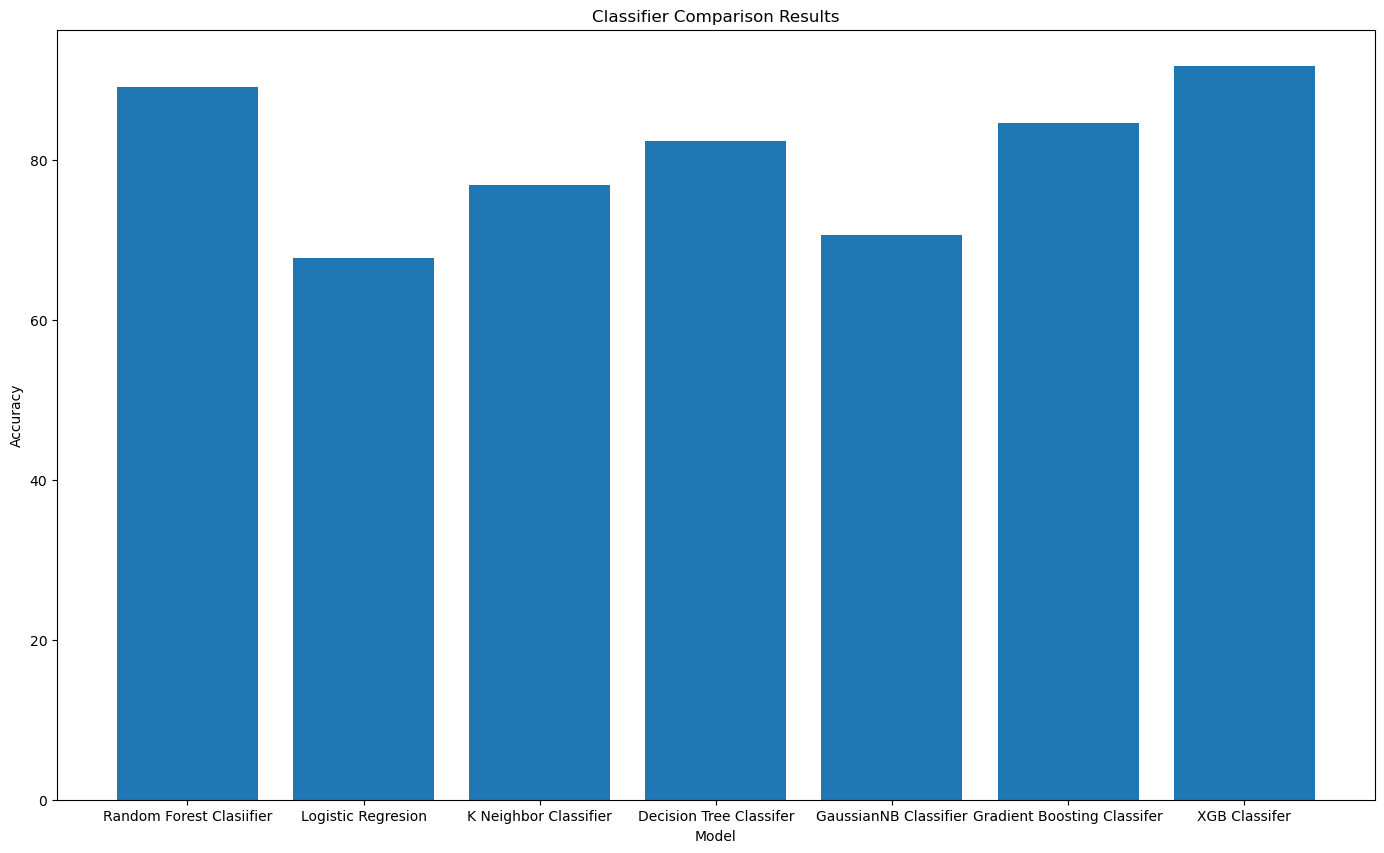

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 10))

plt.bar(results_df['Model'],results_df['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Classifier Comparison Results')
plt.show()

In [19]:
d

,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status
0,59000,0,123.0,3,2,35000.0,16.02,10,3,1
1,9600,1,5.0,0,0,1000.0,11.14,1,2,0
2,9600,2,1.0,1,1,5500.0,12.87,5,3,1
3,65500,0,4.0,1,1,35000.0,15.23,10,2,1
4,54400,0,8.0,1,1,35000.0,14.27,10,4,1
...,...,...,...,...,...,...,...,...,...,...
32573,53000,2,1.0,3,2,5800.0,13.16,7,30,0
32574,120000,2,4.0,3,0,17625.0,7.49,4,19,0
32575,76000,0,3.0,5,1,35000.0,10.99,5,28,1
32576,150000,2,5.0,3,1,15000.0,11.48,6,26,0


In [20]:
d


,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status
0,59000,0,123.0,3,2,35000.0,16.02,10,3,1
1,9600,1,5.0,0,0,1000.0,11.14,1,2,0
2,9600,2,1.0,1,1,5500.0,12.87,5,3,1
3,65500,0,4.0,1,1,35000.0,15.23,10,2,1
4,54400,0,8.0,1,1,35000.0,14.27,10,4,1
...,...,...,...,...,...,...,...,...,...,...
32573,53000,2,1.0,3,2,5800.0,13.16,7,30,0
32574,120000,2,4.0,3,0,17625.0,7.49,4,19,0
32575,76000,0,3.0,5,1,35000.0,10.99,5,28,1
32576,150000,2,5.0,3,1,15000.0,11.48,6,26,0


In [21]:
x=np.array([[54400,0,8,1,1,35000,14.27,10,4]])
x.astype(int)
x

array([[5.440e+04, 0.000e+00, 8.000e+00, 1.000e+00, 1.000e+00, 3.500e+04,
        1.427e+01, 1.000e+01, 4.000e+00]])

In [22]:
pred=ml_model.predict(x)
pred

array([1])

In [23]:
import pickle

In [24]:
with open('saved_model.pkl','wb') as file:
    pickle.dump(ml_model,file)

In [25]:
with open('saved_model.pkl','rb') as file:
    load_model=pickle.load(file)
    


In [26]:
prediction=load_model.predict(x)

In [27]:
prediction

array([1])